In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import cv2
from PIL import Image
import os

In [2]:
mask_img0 = Image.open("C:/Users/rupik/Documents/Edu labs/face mask/train/with_mask/0-with-mask.jpg")
mask_img1 = Image.open("C:/Users/rupik/Documents/Edu labs/face mask/train/with_mask/7-with-mask.jpg")
without_mask_img0 = Image.open("C:/Users/rupik/Documents/Edu labs/face mask/train/without_mask/6eefca69d02aea9bc8bd1fc9759a9721.jpg")

In [3]:
fig = plt.figure(figsize=(20,9))

<Figure size 1440x648 with 0 Axes>

Text(0.5, 1.0, 'With Mask')

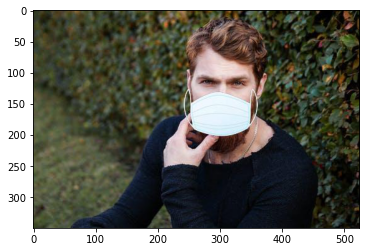

In [4]:
# Add subplotting to display multiple images
a1 = fig.add_subplot(1, 3, 1)
# plt.imshow() - Display Images using matplotlib
img_plot = plt.imshow(mask_img0)
a1.set_title("With Mask", fontsize = 10)

Text(0.5, 1.0, 'With Mask')

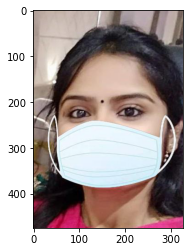

In [5]:

a2 = fig.add_subplot(1, 3, 2)
img_plot = plt.imshow(mask_img1)
a2.set_title("With Mask", fontsize = 10)

Text(0.5, 1.0, 'Withou Mask')

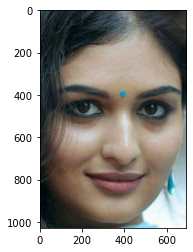

In [6]:

a3 = fig.add_subplot(1, 3, 3)
img_plot = plt.imshow(without_mask_img0)
a3.set_title("Withou Mask", fontsize = 10)

#### Image Data Augmentation
    * All RGB Image Data will be used to create new samples for Training
    * New Sample will be transformed using Image Data Generator
    * Images will be resampled using pixel normalization (Divide each pixel value by 255), shear range, zoom, brightness etc.


In [7]:
from tensorflow.keras.preprocessing.image import load_img
from tensorflow.keras.preprocessing.image import ImageDataGenerator, img_to_array
from numpy import expand_dims

In [8]:
# load_img() used to load image data
img = load_img('C:/Users/rupik/Documents/Edu labs/face mask/train/with_mask/0-with-mask.jpg')

In [9]:
data = img_to_array(img)
# axis = 0: rowwise, axis = 1 (columnwise)
samples = expand_dims(data, axis = 0)

In [10]:
# 350 x 525 x 3 = Shape of Image, 3 = RGB Matrix
data.shape

(350, 525, 3)

In [11]:
samples.shape

(1, 350, 525, 3)

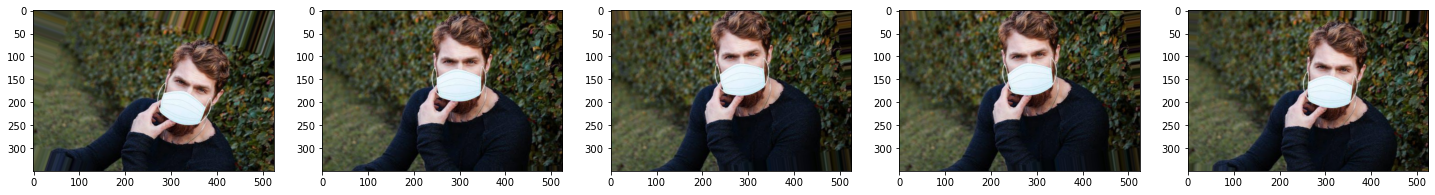

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

In [12]:
# Rotation of Image
datagen = ImageDataGenerator(rotation_range=20)
IDG = datagen.flow(samples, batch_size = 1)
fig, ax = plt.subplots(1, 5, figsize = (25,15))
for i in range(5):
    fig = plt.figure()
    batch = IDG.next()
    image1 = batch[0].astype('uint8')
    ax[i].imshow(image1)
plt.show()

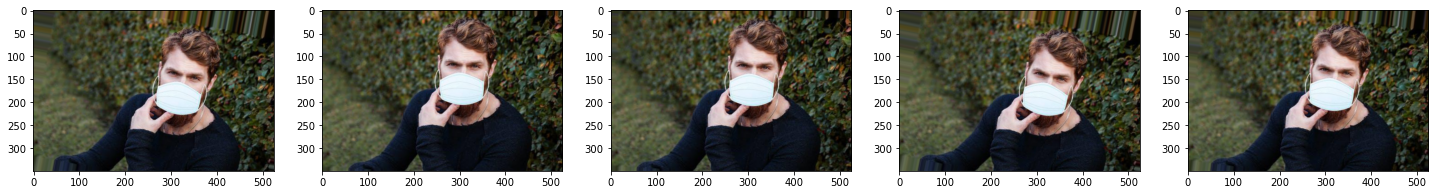

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

In [13]:
# Rotation of Image
datagen = ImageDataGenerator(rotation_range=20)
IDG = datagen.flow(samples, batch_size = 1)
fig, ax = plt.subplots(1, 5, figsize = (25,15))
for i in range(5):
    fig = plt.figure()
    batch = IDG.next()
    image1 = batch[0].astype('uint8')
    ax[i].imshow(image1)
plt.show()

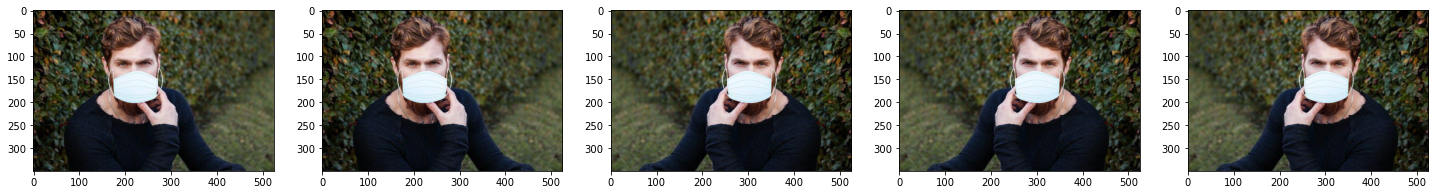

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

In [14]:
# Horizontal Flip Image Data
datagen = ImageDataGenerator(horizontal_flip=True)
IDG = datagen.flow(samples, batch_size = 1)
fig, ax = plt.subplots(1, 5, figsize = (25,15))
for i in range(5):
    fig = plt.figure()
    batch = IDG.next()
    image1 = batch[0].astype('uint8')
    ax[i].imshow(image1)
plt.show()

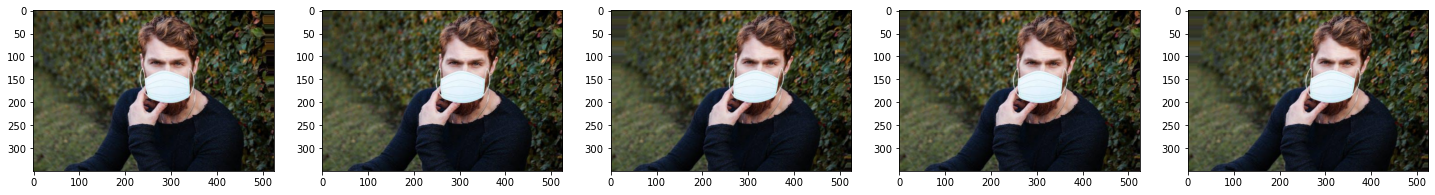

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

In [15]:
# Shear Range
datagen = ImageDataGenerator(shear_range=10)
IDG = datagen.flow(samples, batch_size = 1)
fig, ax = plt.subplots(1, 5, figsize = (25,15))
for i in range(5):
    fig = plt.figure()
    batch = IDG.next()
    image1 = batch[0].astype('uint8')
    ax[i].imshow(image1)
plt.show()

In [16]:
# Image Pixel Normalization
# Train Image Data Generator
train_datagen = ImageDataGenerator(
                            rescale=1./255, rotation_range=20,shear_range=20, zoom_range=0.2, 
                            fill_mode='nearest',horizontal_flip=True)

# Test Image Data Generator
test_datagen = ImageDataGenerator(rescale=1./255)

In [17]:
training_set = train_datagen.flow_from_directory("C:/Users/rupik/Documents/Edu labs/face mask/train/", 
                                                  target_size = (150,150),
                                                  batch_size = 16, class_mode = 'binary')
test_set = test_datagen.flow_from_directory('C:/Users/rupik/Documents/Edu labs/face mask/test/', 
                                            target_size = (150,150),
                                            batch_size = 16, class_mode = 'binary')


Found 1314 images belonging to 2 classes.
Found 194 images belonging to 2 classes.


In [18]:
training_set.image_shape

training_set.class_indices

{'with_mask': 0, 'without_mask': 1}

In [19]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Flatten, Dense, Conv2D, MaxPooling2D
from tensorflow.keras.optimizers import Adam

In [20]:
def build_model():
    # Model is Sequential 
    model = Sequential()
    # Conv Net Layer - I
    model.add(Conv2D(filters = 64, kernel_size = (3,3), padding = 'same', activation = 'relu',
                    input_shape = (150,150,3)))
    # MaxPooling
    model.add(MaxPooling2D())
    
    # Conv Net Layer - II
    model.add(Conv2D(filters = 64, kernel_size = (3,3), padding = 'same', activation = 'relu'))
    # MaxPooling
    model.add(MaxPooling2D())
    
    # Conv Net Layer - III
    model.add(Conv2D(filters = 64, kernel_size = (3,3), padding = 'same', activation = 'relu'))
    # MaxPooling
    model.add(MaxPooling2D())
    
    # Flatten
    model.add(Flatten())
    
    # Fully Connected Layer
    model.add(Dense(units = 100, activation = 'relu'))
    # Binary Class Classification O/P Layer
    model.add(Dense(units = 1, activation = 'sigmoid'))
    
    # Learning Rate(alpha = (0.00001-1)) & Optimizers - Adam
    adam_optimizer = Adam(learning_rate= 0.0001)
    
    # Loss - binary_crossentropy, classification_metrics = 'accuracy'
    model.compile(loss = 'binary_crossentropy', optimizer = adam_optimizer, metrics = ['accuracy'])
    
    return model

model = build_model()

model.summary()


Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 150, 150, 64)      1792      
                                                                 
 max_pooling2d (MaxPooling2D  (None, 75, 75, 64)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 75, 75, 64)        36928     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 37, 37, 64)       0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 37, 37, 64)        36928     
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 18, 18, 64)       0

In [21]:
# Save Best Model 
from tensorflow.keras import callbacks
filepath="C:/Users/rupik/Documents/Edu labs/face mask/best.hdf5"
checkpoint = callbacks.ModelCheckpoint(filepath, monitor='val_loss',save_best_only=True, 
                                       mode='min', verbose=1)
checkpoint

In [22]:
# generator = Image Data Train Generator, validation_data = test dataset, epochs = Iterations
history = model.fit_generator(generator= training_set, validation_data= test_set, epochs=30, 
                              shuffle=True, callbacks=[checkpoint], verbose = 1)

C:\Users\rupik\AppData\Local\Temp/ipykernel_7304/4202591235.py:2: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  history = model.fit_generator(generator= training_set, validation_data= test_set, epochs=30,


Epoch 1/30
83/83 [==============================] - ETA: 0s - loss: 0.5700 - accuracy: 0.7100
Epoch 1: val_loss improved from inf to 0.38982, saving model to C:/Users/rupik/Documents/Edu labs/face mask\best.hdf5
83/83 [==============================] - 94s 1s/step - loss: 0.5700 - accuracy: 0.7100 - val_loss: 0.3898 - val_accuracy: 0.8299
Epoch 2/30
83/83 [==============================] - ETA: 0s - loss: 0.2413 - accuracy: 0.9209
Epoch 2: val_loss improved from 0.38982 to 0.15754, saving model to C:/Users/rupik/Documents/Edu labs/face mask\best.hdf5
83/83 [==============================] - 90s 1s/step - loss: 0.2413 - accuracy: 0.9209 - val_loss: 0.1575 - val_accuracy: 0.9381
Epoch 3/30
83/83 [==============================] - ETA: 0s - loss: 0.1475 - accuracy: 0.9475
Epoch 3: val_loss improved from 0.15754 to 0.14349, saving model to C:/Users/rupik/Documents/Edu labs/face mask\best.hdf5
83/83 [==============================] - 88s 1s/step - loss: 0.1475 - accuracy: 0.9475 - val_loss:

Epoch 29/30
83/83 [==============================] - ETA: 0s - loss: 0.0442 - accuracy: 0.9871
Epoch 29: val_loss did not improve from 0.08469
83/83 [==============================] - 95s 1s/step - loss: 0.0442 - accuracy: 0.9871 - val_loss: 0.0916 - val_accuracy: 0.9691
Epoch 30/30
83/83 [==============================] - ETA: 0s - loss: 0.0293 - accuracy: 0.9886
Epoch 30: val_loss did not improve from 0.08469
83/83 [==============================] - 96s 1s/step - loss: 0.0293 - accuracy: 0.9886 - val_loss: 0.1009 - val_accuracy: 0.9691


### CNN classification metric


In [25]:
model.load_weights('C:/Users/rupik/Documents/Edu labs/face mask/best.hdf5')

In [26]:
predictions = model.predict(test_set)

13/13 [==============================] - 4s 252ms/step


In [27]:
yhat = np.round(predictions)

model.evaluate(test_set)

13/13 [==============================] - 4s 286ms/step - loss: 0.0847 - accuracy: 0.9691


[0.08468803763389587, 0.969072163105011]

In [28]:
#multi-D array to 1D array
yhat.ravel()

array([1., 0., 0., 0., 1., 1., 1., 1., 1., 1., 1., 1., 1., 0., 1., 0., 0.,
       1., 0., 1., 0., 1., 0., 0., 0., 1., 0., 1., 1., 1., 0., 0., 1., 0.,
       1., 0., 0., 0., 0., 1., 0., 1., 0., 0., 0., 1., 0., 1., 1., 1., 1.,
       0., 0., 0., 0., 1., 1., 0., 0., 0., 1., 0., 1., 1., 0., 0., 1., 1.,
       0., 0., 1., 1., 1., 1., 0., 0., 1., 0., 0., 0., 0., 0., 1., 1., 0.,
       0., 1., 0., 0., 1., 1., 0., 1., 0., 1., 1., 0., 1., 0., 0., 0., 1.,
       1., 0., 1., 1., 0., 0., 1., 0., 0., 0., 0., 1., 1., 1., 1., 0., 0.,
       0., 0., 1., 1., 0., 1., 0., 1., 1., 0., 0., 0., 0., 1., 1., 1., 1.,
       0., 0., 0., 0., 0., 1., 0., 1., 1., 1., 1., 0., 1., 0., 1., 0., 0.,
       1., 1., 0., 1., 1., 1., 0., 0., 0., 0., 1., 0., 0., 1., 1., 1., 0.,
       1., 1., 0., 1., 0., 1., 1., 0., 1., 0., 0., 0., 1., 1., 0., 0., 0.,
       1., 1., 0., 1., 1., 1., 0.], dtype=float32)

In [29]:
test_set.classes

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1])

In [31]:
from sklearn.metrics import classification_report, confusion_matrix
confusion_matrix(yhat.ravel(),test_set.classes)


array([[50, 49],
       [47, 48]], dtype=int64)

<AxesSubplot:>

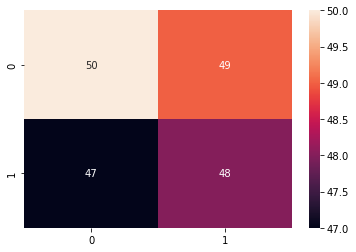

In [32]:
import seaborn as sns
sns.heatmap(confusion_matrix(yhat.ravel(),test_set.classes), annot = True)

### Making new prediction

In [35]:
from tensorflow.keras.preprocessing import image
#import datetime
# Using pre-saved model into the new model (No need to re-train model)
model.load_weights("C:/Users/rupik/Documents/Edu labs/face mask/best.hdf5")

color_dict={0:(0,255,0), 1:(0,0,255)}

cap=cv2.VideoCapture(0)
face_cascade=cv2.CascadeClassifier("C:/Users/rupik/Documents/Edu labs/haarcascade_frontalface_default.xml")
while cap.isOpened():
    _,img=cap.read()
    face=face_cascade.detectMultiScale(img,scaleFactor=1.3,minNeighbors=5)
    for(x,y,w,h) in face:
        face_img = img[y:y+h, x:x+w]
        cv2.imwrite('temp.jpg',face_img)
        # These are transformation of image to satify the model input image
        test_image=image.load_img('temp.jpg',target_size=(150,150,3))
        test_image=image.img_to_array(test_image)
        test_image=np.expand_dims(test_image,axis = 0)
        # predict
        pred = model.predict(test_image)[0][0]
        print(pred)
        if pred == 1:
            cv2.rectangle(img,(x,y),(x+w,y+h),color_dict[pred],2)
            cv2.rectangle(img,(x,y-40),(x+w,y),color_dict[pred],-1)
            cv2.putText(img,'NO MASK',(x, y-10),cv2.FONT_HERSHEY_SIMPLEX,0.7,(255,255,255),2)
        else:
            cv2.rectangle(img,(x,y),(x+w,y+h),color_dict[pred],2)
            cv2.rectangle(img,(x,y-40),(x+w,y),color_dict[pred],-1)
            cv2.putText(img,'MASK',(x, y-10),cv2.FONT_HERSHEY_SIMPLEX,0.7,(255,255,255),2)
    
    cv2.imshow('img', img)
    
    if cv2.waitKey(1) == ord('q'):
        break
cap.release()
cv2.destroyAllWindows()




1/1 [==============================] - 0s 124ms/step
1.0
1/1 [==============================] - 0s 58ms/step
1.0
1/1 [==============================] - 0s 66ms/step
1.0
1/1 [==============================] - 0s 49ms/step
1.0
1/1 [==============================] - 0s 48ms/step
1.0
1/1 [==============================] - 0s 53ms/step
1.0
1/1 [==============================] - 0s 47ms/step
1.0
1/1 [==============================] - 0s 46ms/step
1.0
1/1 [==============================] - 0s 60ms/step
1.0
1/1 [==============================] - 0s 59ms/step
1.0
1/1 [==============================] - 0s 53ms/step
1.0
1/1 [==============================] - 0s 49ms/step
1.0
1/1 [==============================] - 0s 48ms/step
1.0
1/1 [==============================] - 0s 46ms/step
1.0
1/1 [==============================] - 0s 55ms/step
1.0
1/1 [==============================] - 0s 54ms/step
1.0
1/1 [==============================] - 0s 54ms/step
1.0
1/1 [==============================] - 0s 51ms/

KeyError: 4.4530072e-23